In [21]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
dfo = pd.read_csv('vgsales.csv')
dfo.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [71]:
## dfo is our original data set before cleaning.
dfo
dfo.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [73]:
np.count_nonzero(dfo.isnull())        

329

In [92]:
### All null values are dropped to clean the dataframe. 329 rows are removed here.
dfc=dfo.dropna().reset_index()
dfc

,index,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...
16286,16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [93]:
### Dropping duplicate rows.Looks like no row is duplicated here.
dfc.drop_duplicates(inplace = True)
dfc

,index,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...
16286,16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [95]:
## Converting Year data type to integer 
dfc['Year'] = dfc['Year'].astype(int)
dfc = df
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [96]:
### Sales data for each Genre
df1=df.groupby('Genre')
df1

In [97]:
##Sales details for Racing Games
racing = df1.get_group('Racing') .reset_index()
racing

,index,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
1,11,12,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
2,28,29,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
3,42,43,Mario Kart 7,3DS,2011,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21
4,47,48,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
...,...,...,...,...,...,...,...,...,...,...,...,...
1220,16522,16525,Karnaaj Rally,GBA,2003,Racing,Jaleco,0.01,0.00,0.00,0.00,0.01
1221,16530,16533,Sébastien Loeb Rally Evo,XOne,2016,Racing,Milestone S.r.l,0.00,0.01,0.00,0.00,0.01
1222,16573,16576,Mini Desktop Racing,Wii,2007,Racing,Popcorn Arcade,0.01,0.00,0.00,0.00,0.01
1223,16574,16577,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008,Racing,Takara Tomy,0.00,0.00,0.01,0.00,0.01


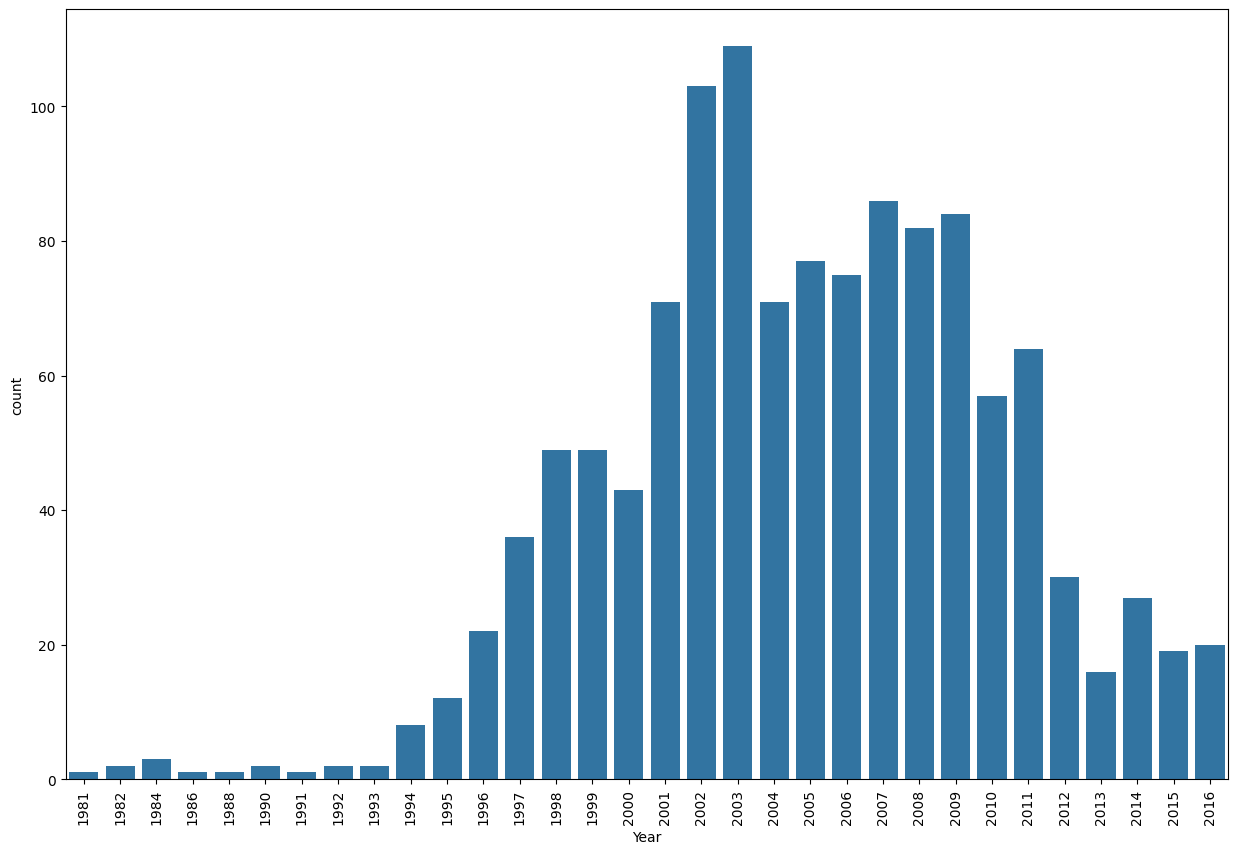

In [132]:
## Bar Plot showing Sales of Racing genre of games in each year

plt.figure(figsize=(15, 10))
sns.countplot(racing, x="Year")
plt.xticks(rotation=90)
plt.title= ('Count of Racing Games Sold in each Year')

In [46]:
## which Genre of games were released the most? Action was the most popular genre
df['Genre'].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

In [139]:
## Which genre of games made the maximum amount of sales in Million? Action is the clear winner in terms of global sales.
gen = df.groupby(by=['Genre'])['Global_Sales'].sum()
gen = gen.reset_index()
gen = gen.sort_values(by=['Global_Sales'], ascending=False)
gen                            

,Genre,Global_Sales
0,Action,1722.84
10,Sports,1309.24
8,Shooter,1026.20
7,Role-Playing,923.83
4,Platform,829.13
3,Misc,789.87
6,Racing,726.76
2,Fighting,444.05
9,Simulation,389.98
5,Puzzle,242.21


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

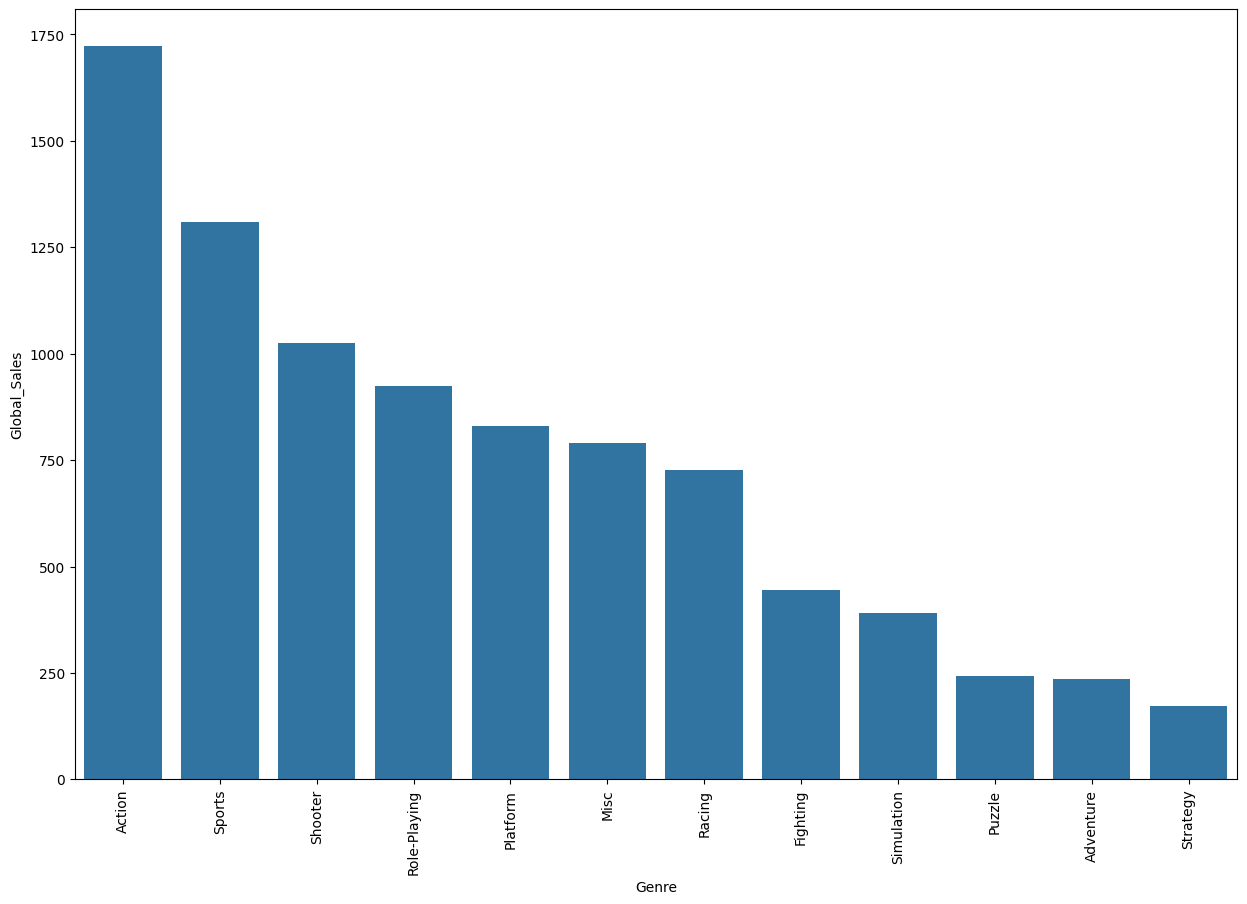

In [145]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=gen)
plt.xticks(rotation=90)
        

In [150]:
## Area wise sales of each publisher
dfpub= df[['Publisher','NA_Sales','EU_Sales', 'NA_Sales','Other_Sales']]
pdetails = dfpub.groupby(by=['Publisher']).sum()
pdetails

,NA_Sales,EU_Sales,NA_Sales,Other_Sales
Publisher,,,,
10TACLE Studios,0.07,0.04,0.07,0.00
1C Company,0.01,0.07,0.01,0.02
20th Century Fox Video Games,1.82,0.10,1.82,0.01
2D Boy,0.00,0.03,0.00,0.01
3DO,6.48,3.04,6.48,0.63
...,...,...,...,...
id Software,0.02,0.00,0.02,0.00
imageepoch Inc.,0.00,0.00,0.00,0.00
inXile Entertainment,0.02,0.06,0.02,0.01


In [160]:
## Area wise sales of each Genre
dfg= df[['Genre','NA_Sales','EU_Sales', 'JP_Sales','Other_Sales']]
gdetails = dfg.groupby(by=['Genre']).sum()
gdetails

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,861.77,516.48,158.65,184.92
Adventure,101.93,63.74,51.99,16.70
Fighting,220.74,100.00,87.15,36.19
Misc,396.92,211.77,106.67,73.92
Platform,445.99,200.65,130.65,51.51
Puzzle,122.01,50.52,56.68,12.47
Racing,356.93,236.31,56.61,76.68
Role-Playing,326.50,187.57,350.29,59.38
Shooter,575.16,310.45,38.18,101.90


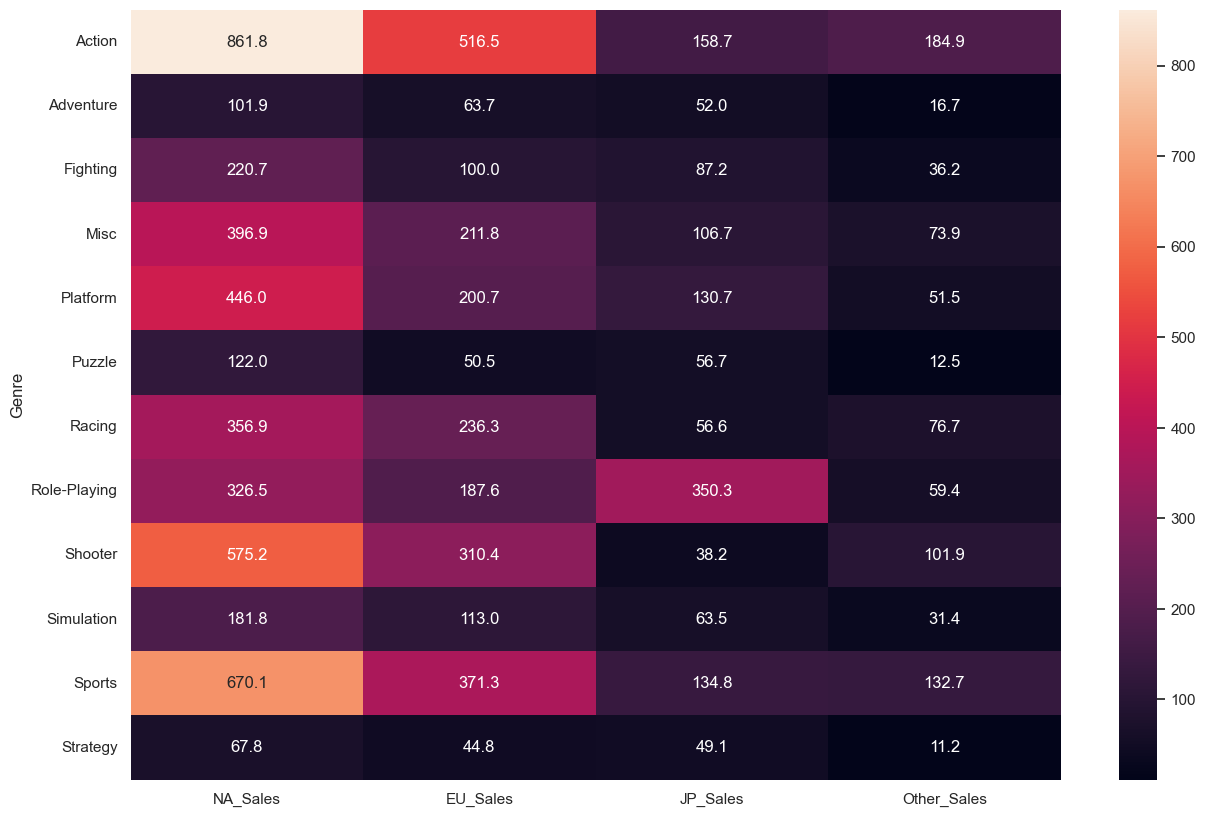

In [161]:
plt.figure(figsize=(15, 10))
sns.heatmap(gdetails, annot=True, fmt = '.1f')
plt.show()

In [154]:
### Total Sales by each publisher
salesbyp = data[['Publisher', 'Global_Sales']]
salesbyp = salesbyp.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
salesbyp = pd.DataFrame(salesbyp).reset_index()
salesbyp

,Publisher,Global_Sales
0,Nintendo,151.30
1,Electronic Arts,145.77
2,Sony Computer Entertainment,110.57
3,THQ,40.17
4,Codemasters,34.62
...,...,...
123,Encore,0.02
124,Wanadoo,0.02
125,O-Games,0.02
126,Virgin Interactive,0.02


In [155]:
##Filter top 10 publishers by total sales
salesbyp = salesbyp.head(10)
salesbyp

,Publisher,Global_Sales
0,Nintendo,151.30
1,Electronic Arts,145.77
2,Sony Computer Entertainment,110.57
3,THQ,40.17
4,Codemasters,34.62
5,Microsoft Game Studios,33.08
6,Sega,21.83
7,Take-Two Interactive,21.25
8,Activision,17.31
9,Ubisoft,15.83


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Sony Computer Entertainment'),
  Text(3, 0, 'THQ'),
  Text(4, 0, 'Codemasters'),
  Text(5, 0, 'Microsoft Game Studios'),
  Text(6, 0, 'Sega'),
  Text(7, 0, 'Take-Two Interactive'),
  Text(8, 0, 'Activision'),
  Text(9, 0, 'Ubisoft')])

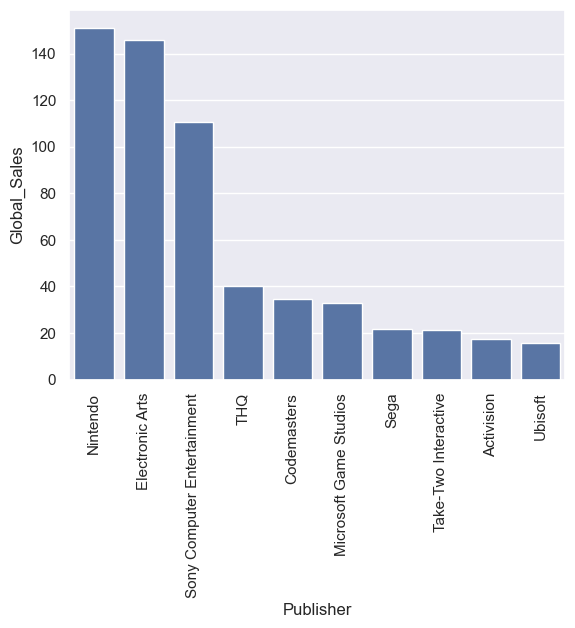

In [157]:
sns.barplot(x='Publisher', y='Global_Sales', data=salesbyp)
plt.xticks(rotation=90)

<Axes: xlabel='EU_Sales', ylabel='Count'>

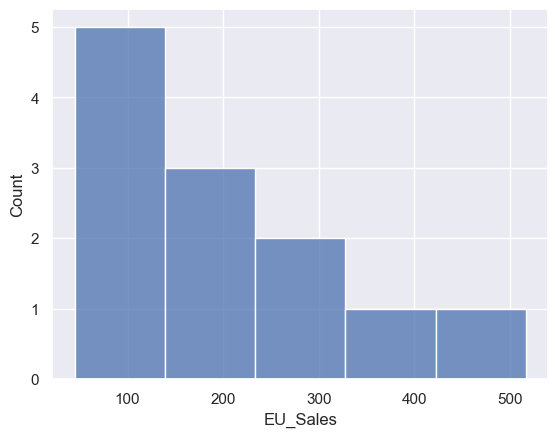

In [158]:
### Histograms by different area sales
sns.histplot(data=gdetails, x="EU_Sales")


<Axes: xlabel='NA_Sales', ylabel='Count'>

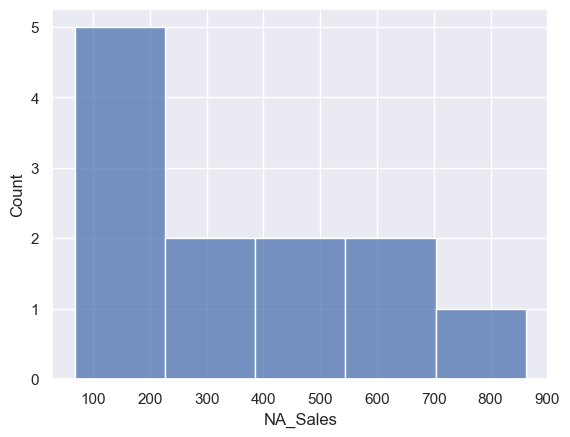

In [162]:
sns.histplot(data=gdetails, x="NA_Sales")

<Axes: xlabel='JP_Sales', ylabel='Count'>

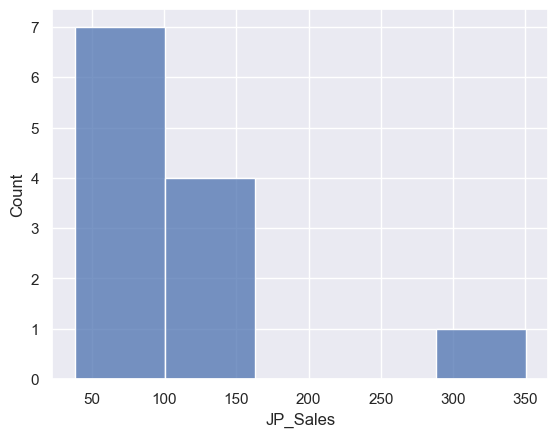

In [163]:
sns.histplot(data=gdetails, x="JP_Sales")

<Axes: xlabel='Other_Sales', ylabel='Count'>

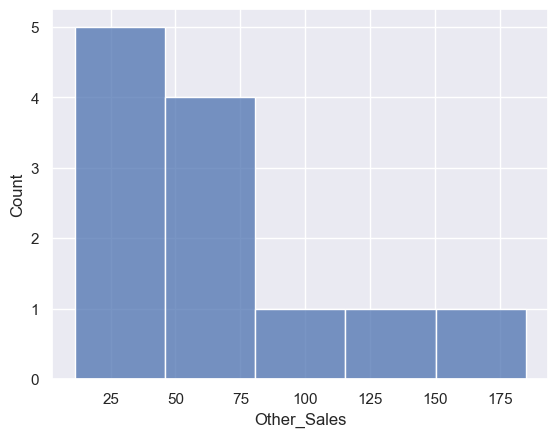

In [164]:
sns.histplot(data=gdetails, x="Other_Sales")